<a href="https://colab.research.google.com/github/alexbrun01/Book-Data-Science-do-Zero-/blob/main/Caminho_Minimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de utilização da biblioteca Networkx para grafos

## Autor: Hemerson Pistori (pistori@ucdb.br)

Neste exemplo eu calculo e mostro um caminho de custo mínimo ligando dois vértices. Aqui tem um vídeo meu explicando o algoritmo de Dijkstra: ["Caminho de Custo Mínimo usando Djikstra"](https://youtu.be/njhbUoXhvac)

In [ ]:
# Importa uma biblioteca para trabalhar com grafos 
import networkx as nx 

# Cria um grafo vazio
G = nx.Graph()

# Coloca os vértices e arestas em uma lista
vertices=['a', 'b', 'c', 'd','e','f','g']
arestas=[('a','b',{'weight': 2}),('a','c',{'weight': 1}),('b','c',{'weight': 1}),
         ('b','e',{'weight': 1}),('c','f',{'weight': 10}),('e','f',{'weight': 4}),
         ('f','g',{'weight': 2}),('d','g',{'weight': 1}),('c','d',{'weight': 4})                                         
        ]


# Coloca os vértices e arestas no grafo usando as listas
G.add_nodes_from(vertices)
G.add_edges_from(arestas)

# Descobre o caminho de custo mínimo (ccm) do vértice 'a' até 'e' 
ccm = nx.dijkstra_path(G,source = 'a', target = 'e')

# Mostra a sequência de vértices do caminho mínimo
print('Caminho de custo mínimo: ',ccm)

# Mostra qual o tamanho do caminho (note que usei outra forma mais simples de passar os parâmetros)
print('Tamanho do caminho de custo mínimo: ',nx.dijkstra_path_length(G,'a','e'))

# Importante: no exercício da disciplina os alunos precisam IMPLEMENTAR o
# algoritmo de Dijkstra e não apenas usar uma função pronta para ganhar
# todos os PIC$

Caminho de custo mínimo:  ['a', 'b', 'e']
Tamanho do caminho de custo mínimo:  3


# Visualizando o grafo e o menor caminho

Existem várias formas de visualização e abaixo eu mostra uma delas (tem que mergulhar na documentação da biblioteca e em outros exemplos da internet para encontrar outras). Aprendi esta forma vendo este exemplo aqui, mas mudei algumas pequenas coisas: ['NetworkXBasics'](http://avinashu.com/tutorial/pythontutorialnew/NetworkXBasics.html)



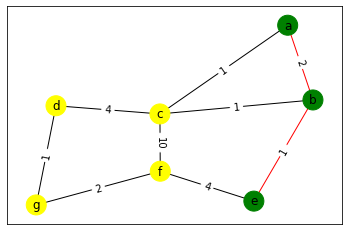

In [ ]:
# Importa uma biblioteca para gerar figuras e gráficos
import matplotlib.pyplot as plt

# Guarda os pesos de cada aresta em um dicionário
pesos =nx.get_edge_attributes(G,'weight')

# Separa as arestas que fazem parte do menor caminho e guarda em arestas_vermelhas
arestas_vermelhas = list(zip(ccm,ccm[1:]))

# Marca os vértices que estão no CCM para serem pintados de azul e os outros de branco
cor_vertices = ['yellow' if not node in ccm else 'green' for node in G.nodes()]

# Marca as arestas que estão no CCM para serem pintados de vermelho e as outras de preto
cor_arestas = ['black' if not edge in arestas_vermelhas else 'red' for edge in G.edges()]

# Calcula automaticamente a posição de cada vértice 
# Note que as posições mudam de uma execução para a outra, dá para fazer diferente
# e fixar cada posição

pos=nx.spring_layout(G) 

# Prepara os vértices para serem desenhados usando as cores pré-determinadas e o tamanho 400
nx.draw_networkx(G, pos,node_color= cor_vertices,edge_color= cor_arestas, node_size=400)

# Preparar para mostrar os pesos de cada aresta (sem isso mostra apenas as linhas)
nx.draw_networkx_edge_labels(G, pos, edge_labels=pesos)

# Mostra o grafo
plt.show()